In [1]:
import os
import math
from gnss_ins_sim.sim import imu_model
from gnss_ins_sim.sim import ins_sim
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
motdef_file = "motion_def_files/" + "motion_def-long_drive.csv"
result_path = "../data/simulation/longdrive"
number_of_runs = 10

In [3]:
fs = 100.0          # IMU sample frequency
fs_gps = fs         # GPS sample frequency
fs_mag = fs         # magnetometer sample frequency, not used for now

def path_gen():
    imu_err = 'mid-accuracy'
    imu = imu_model.IMU(accuracy=imu_err, axis=6, gps=True)

    sim = ins_sim.Sim([fs, fs_gps, fs_mag], motdef_file, ref_frame=0, imu=imu)
    sim.run(number_of_runs)
    sim.results(result_path) # input_file[:-3]
    #sim.plot(['ref_pos'], opt={'ref_pos': '3d'})
    
    '''
    # now again with ecef frame
    sim = ins_sim.Sim([fs, fs_gps, fs_mag], input_file + ".csv",
                      ref_frame=1,
                      imu=imu,
                      mode=None,
                      env=None,
                      algorithm=None)
    sim.run(1)
    sim.results(input_file[:-3]+"2")
    '''
    
path_gen()


------------------------------------------------------------
Sample frequency of IMU: [fs] = 100.0 Hz
Reference frame: 0
Simulation time duration: 965.52 s
Simulation runs: 10

------------------------------------------------------------
Simulation results are saved to C:\Users\MICSORG\Desktop\re\data\simulation\longdrive
The following results are saved:
	time: sample time
	ref_pos: true LLA pos in the navigation frame
	ref_vel: true vel in the NED frame
	ref_att_euler: true attitude (Euler angles, ZYX)
	ref_accel: true accel in the body frame
	ref_gyro: true angular velocity in the body frame
	gps_time: GPS sample time
	ref_gps: true GPS LLA position and NED velocity
	gps_visibility: GPS visibility
	accel: accel measurements
	gyro: gyro measurements
	gps: GPS LLA position and NED velocity measurements
	ref_att_quat: true attitude (quaternion)



In [4]:
t = pd.read_csv(result_path + "/time.csv")
t.head()

,time (sec)
0,0.00
1,0.01
2,0.02
3,0.03
4,0.04


In [5]:
gt = pd.read_csv(result_path + "/ref_gps.csv")
gt.head()

,ref_gps_lat (deg),ref_gps_lon (deg),ref_gps_alt (m),ref_gps_vN (m/s),ref_gps_vE (m/s),ref_gps_vD (m/s)
0,31.508183,120.401989,0.0,0.0,0.0,0.0
1,31.508183,120.401989,0.0,0.0,0.0,0.0
2,31.508183,120.401989,0.0,0.0,0.0,0.0
3,31.508183,120.401989,0.0,0.0,0.0,0.0
4,31.508183,120.401989,0.0,0.0,0.0,0.0


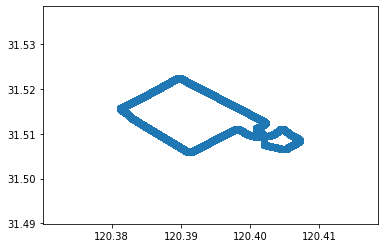

In [6]:
plt.scatter(gt.values[:,1], gt.values[:,0])
plt.show()